In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
prod_off = pd.read_csv("Product_Offering_Data.csv")

# Check dataset structure
print(prod_off.info())
print(prod_off.head())
prod_off.drop(columns=['Target_Age_Group'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_ID           15 non-null     int64  
 1   Product_Name         15 non-null     object 
 2   Product_Type         15 non-null     object 
 3   Risk_Level           15 non-null     object 
 4   Target_Age_Group     0 non-null      float64
 5   Target_Income_Group  15 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 852.0+ bytes
None
   Product_ID                   Product_Name     Product_Type Risk_Level  \
0           1           Platinum Credit Card      Credit Card     Medium   
1           2           Gold Savings Account  Savings Account        Low   
2           3  High-Yield Investment Account       Investment       High   
3           4                  Mortgage Loan             Loan     Medium   
4           5                      Auto Loan  

In [3]:
# Remove duplicate rows
prod_off = prod_off.drop_duplicates()

# Check for missing values
print("Missing values before handling:\n", prod_off.isnull().sum())

Missing values before handling:
 Product_ID             0
Product_Name           0
Product_Type           0
Risk_Level             0
Target_Income_Group    0
dtype: int64


In [5]:
# One-hot encode categorical variables
categorical_columns = ['Product_Type', 'Risk_Level', 'Target_Income_Group']
# Convert categorical variables into numerical form using one-hot encoding
# Converting categorical variables into numerical format using one-hot encoding.
# This ensures machine learning models can interpret categorical data effectively.
prod_off = pd.get_dummies(prod_off, columns=categorical_columns, drop_first=True)
print (prod_off)

   Product_ID                   Product_Name  Product_Type_Investment  \
0           1           Platinum Credit Card                    False   
1           2           Gold Savings Account                    False   
2           3  High-Yield Investment Account                     True   
3           4                  Mortgage Loan                    False   
4           5                      Auto Loan                    False   
5           6                  Personal Loan                    False   
6           7          Youth Savings Account                    False   
7           8     Retirement Investment Fund                     True   
8           9                  Business Loan                    False   
9          10             Travel Credit Card                    False   

   Product_Type_Loan  Product_Type_Savings Account  Risk_Level_Low  \
0              False                         False           False   
1              False                          True      

In [9]:
# Create Product_Category
prod_off['Product_Category'] = prod_off[[col for col in prod_off.columns if col.startswith("Product_Type_")]].idxmax(axis=1)
prod_off['Product_Category'] = prod_off['Product_Category'].str.replace('Product_Type_', '')
prod_off. head (20)

,Product_ID,Product_Name,Product_Type_Investment,Product_Type_Loan,Product_Type_Savings Account,Risk_Level_Low,Risk_Level_Medium,Target_Income_Group_Low,Target_Income_Group_Medium,Target_Age_Group,Product_Category
0,1,Platinum Credit Card,False,False,False,False,True,False,True,47.71,Investment
1,2,Gold Savings Account,False,False,True,True,False,True,False,27.42,Savings Account
2,3,High-Yield Investment Account,True,False,False,False,False,False,False,61.30,Investment
3,4,Mortgage Loan,False,True,False,False,True,False,False,46.25,Loan
4,5,Auto Loan,False,True,False,False,True,False,True,47.03,Loan
5,6,Personal Loan,False,True,False,False,True,True,False,42.86,Loan
6,7,Youth Savings Account,False,False,True,True,False,True,False,20.47,Savings Account
7,8,Retirement Investment Fund,True,False,False,False,False,False,False,64.29,Investment
8,9,Business Loan,False,True,False,False,True,False,True,43.36,Loan
9,10,Travel Credit Card,False,False,False,False,True,False,True,35.62,Investment


In [11]:
# Feature Engineering
# Apply Min-Max Scaling to normalize numerical features between 0 and 1
# Applying Min-Max Scaling to normalize numerical values between 0 and 1.
# This ensures that models are not biased toward large-scale numerical values.
scaler = MinMaxScaler()
prod_off['Target_Age_Group_Scaled'] = scaler.fit_transform(prod_off[['Target_Age_Group']])
prod_off['Total_Product_Types'] = prod_off[['Product_Type_Investment', 'Product_Type_Loan', 'Product_Type_Savings Account']].sum(axis=1)
prod_off['Risk_to_Product_Ratio'] = (prod_off['Risk_Level_Medium'] + (prod_off['Risk_Level_Low'] == 0)) / (prod_off['Total_Product_Types'] + 1)
prod_off['Savings_vs_Loan_Ratio'] = prod_off['Product_Type_Savings Account'] / (prod_off['Product_Type_Loan'] + 1)

def categorize_risk(row):
    if row['Risk_Level_Low'] == 1:
        return 'Low Risk'
    elif row['Risk_Level_Medium'] == 1:
        return 'Medium Risk'
    else:
        return 'High Risk'

prod_off['Risk_Category'] = prod_off.apply(categorize_risk, axis=1)
prod_off. head (20)

,Product_ID,Product_Name,Product_Type_Investment,Product_Type_Loan,Product_Type_Savings Account,Risk_Level_Low,Risk_Level_Medium,Target_Income_Group_Low,Target_Income_Group_Medium,Target_Age_Group,Product_Category,Target_Age_Group_Scaled,Total_Product_Types,Risk_to_Product_Ratio,Savings_vs_Loan_Ratio,Risk_Category
0,1,Platinum Credit Card,False,False,False,False,True,False,True,47.71,Investment,0.621634,0,1.0,0.0,Medium Risk
1,2,Gold Savings Account,False,False,True,True,False,True,False,27.42,Savings Account,0.158603,1,0.0,1.0,Low Risk
2,3,High-Yield Investment Account,True,False,False,False,False,False,False,61.30,Investment,0.931766,1,0.5,0.0,High Risk
3,4,Mortgage Loan,False,True,False,False,True,False,False,46.25,Loan,0.588316,1,0.5,0.0,Medium Risk
4,5,Auto Loan,False,True,False,False,True,False,True,47.03,Loan,0.606116,1,0.5,0.0,Medium Risk
5,6,Personal Loan,False,True,False,False,True,True,False,42.86,Loan,0.510954,1,0.5,0.0,Medium Risk
6,7,Youth Savings Account,False,False,True,True,False,True,False,20.47,Savings Account,0.000000,1,0.0,1.0,Low Risk
7,8,Retirement Investment Fund,True,False,False,False,False,False,False,64.29,Investment,1.000000,1,0.5,0.0,High Risk
8,9,Business Loan,False,True,False,False,True,False,True,43.36,Loan,0.522364,1,0.5,0.0,Medium Risk
9,10,Travel Credit Card,False,False,False,False,True,False,True,35.62,Investment,0.345733,0,1.0,0.0,Medium Risk


In [13]:
# Save processed dataset
prod_off.to_csv("product_offering_final_featured.csv", index=False)

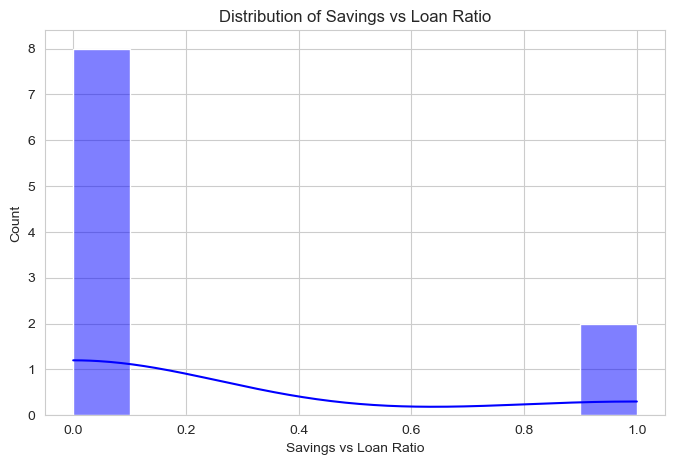

In [15]:
# EDA Visualizations
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
# Plot a histogram to visualize the distribution of a numerical feature
# Plotting a histogram to analyze the distribution of a particular feature.
# Helps to understand skewness and outlier presence in numerical data.
sns.histplot(prod_off['Savings_vs_Loan_Ratio'], bins=10, kde=True, color='blue')
plt.title("Distribution of Savings vs Loan Ratio")
plt.xlabel("Savings vs Loan Ratio")
plt.ylabel("Count")
plt.show()

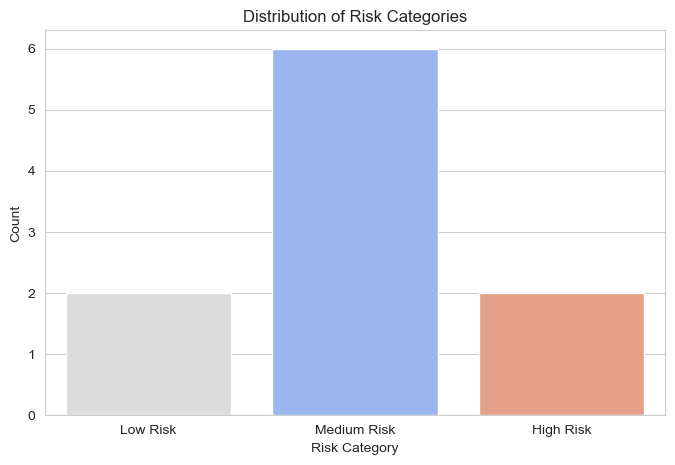

In [17]:
plt.figure(figsize=(8, 5))
# Generate a bar chart to display counts of categorical variables
# Visualizing categorical data distribution using a count plot.
# This helps determine the most and least common product types.
sns.countplot(x='Risk_Category', data=prod_off, hue='Risk_Category', palette='coolwarm', order=['Low Risk', 'Medium Risk', 'High Risk'], legend=False)
plt.title("Distribution of Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()

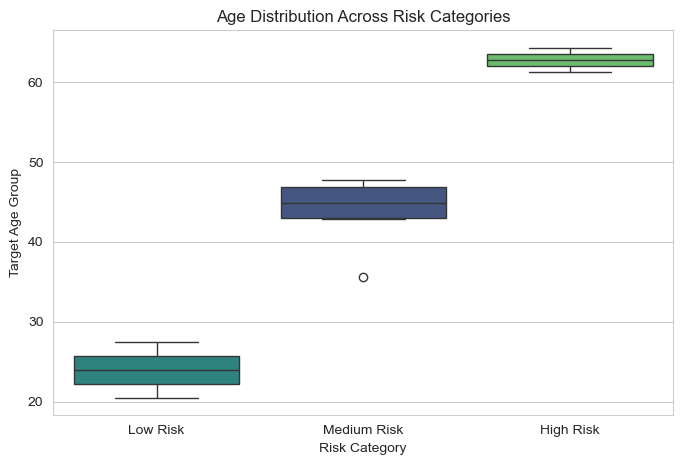

In [19]:
plt.figure(figsize=(8, 5))
# Create a box plot to observe outliers and spread of numerical values across categories
# Generating a box plot to detect outliers and assess the spread of numerical values.
# Useful in identifying extreme values that may impact analysis.
sns.boxplot(x='Risk_Category', y='Target_Age_Group', data=prod_off, hue='Risk_Category', palette='viridis', order=['Low Risk', 'Medium Risk', 'High Risk'], legend=False)
plt.title("Age Distribution Across Risk Categories")
plt.xlabel("Risk Category")
plt.ylabel("Target Age Group")
plt.show()

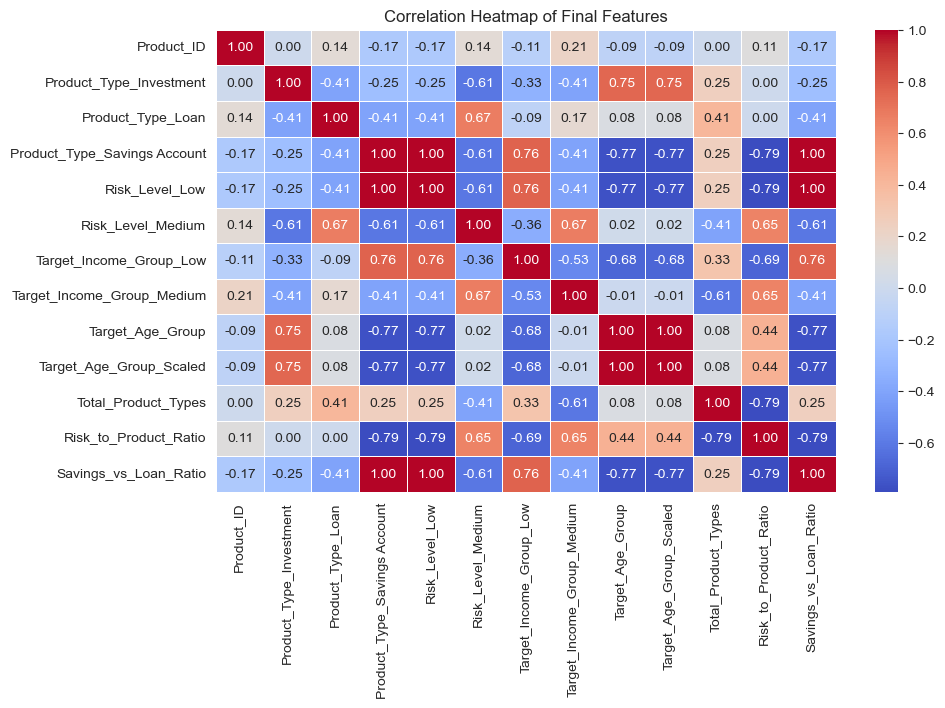

In [21]:
plt.figure(figsize=(10, 6))
# Generate a heatmap to visualize correlations between numerical features
# Creating a correlation heatmap to visualize relationships between numerical variables.
# This helps in understanding which features may impact product offerings the most.
sns.heatmap(prod_off.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Final Features")
plt.show()